In [4]:
import numpy as np

def dilser(low=0.001, limit=100.0, dilfactor = 2.0):
    """Returns a list containing a dilution series that ranges from
    "low" to "limit" by "dilfactor".
    """
    a = [low]
    while a[-1] <= limit:
        a.append(a[len(a)-1]*dilfactor)
    
    return np.array(a)

lig = dilser()

a = np.delete(lig,[15,16])

b = np.delete(lig,[14,17])

c = np.delete(lig,[13,15])

ligset = np.array([lig,a,lig,b,c])

noiseset = np.array([np.random.normal(1,0.05,ligset[i].size) for i in range(ligset.shape[0])])

rtots = np.array([0.001,0.005, 0.01, 0.02, 0.05])

sim_parms = dict({'k11':3.7, 'k21':1.8, 'k22':0.12, 'l20':293.0})

#@profile
def wyman_sim(lig,rtot,parm):
    k11 = parm['k11']
    k21 = parm['k21']
    k22 = parm['k22']
    l20 = parm['l20']
    
    
    ligf = ligset
    ligc = np.concatenate(ligset)
    rtotf = rtots
    
    rfreetop = (-1 - k11*ligc) + \
    (np.sqrt(np.concatenate((np.square((1 + k11*ligf)) + \
    8.*l20*rtotf*(1 + k21*ligf + k21*k22*(np.square(ligf)))))))
    
    rfreebottom = 4*l20*(1 + k21*ligc + k21*k22*(np.square(ligc)))
    
    rfree = rfreetop/rfreebottom
       
    
    bfrac = (k11*ligc + l20*k21*rfree*ligc + \
    2*l20*k21*k22*rfree*(np.square(ligc)))/(1 + 2*l20*rfree + k11*ligc + \
    2*l20*k21*rfree*ligc + 2*l20*k21*k22*rfree*(np.square(ligc)))
    
    return bfrac





wyman_sim(ligset,rtots,sim_parms)

array([ 0.00287218,  0.0057293 ,  0.01139886,  0.02256218,  0.04420898,
        0.08495766,  0.15750031,  0.27442734,  0.43494373,  0.61140532,
        0.76276266,  0.86736558,  0.92969257,  0.9637874 ,  0.98162164,
        0.99074192,  0.99535363,  0.99767247,  0.00212201,  0.00423545,
        0.00843679,  0.01673873,  0.03295043,  0.06388646,  0.12039349,
        0.21575195,  0.3567863 ,  0.52877848,  0.69457034,  0.82154023,
        0.90281887,  0.9492021 ,  0.97402094,  0.99668726,  0.00183875,
        0.00367067,  0.00731417,  0.01452088,  0.02862117,  0.05563083,
        0.10532975,  0.19035641,  0.3191859 ,  0.4825415 ,  0.64899583,
        0.78533335,  0.87867192,  0.93494879,  0.96622051,  0.98277258,
        0.99129847,  0.99562683,  0.0016043 ,  0.00320301,  0.00638376,
        0.0126794 ,  0.02501369,  0.04870285,  0.09251507,  0.16819537,
        0.28486929,  0.43720977,  0.5996735 ,  0.741466  ,  0.84618727,
        0.91418393,  0.97630818,  0.98793257,  0.00136943,  0.00

In [5]:
def wyman_obj_vec(parm,lig,rtot,data,eps=None):
    k11 = parm[0]
    k21 = parm[1]
    k22 = parm[2]
    l20 = parm[3]
    
    ligc = np.concatenate(lig)
    epsc = np.concatenate(eps)
    datac = np.concatenate(data)
    
    rfree = ((-1 - k11*ligc) + \
    (np.sqrt(np.concatenate((np.square((1 + k11*lig)) + \
    8.*l20*rtot*(1 + k21*lig + k21*k22*(np.square(lig))))))) \
    / (4*l20*(1 + k21*ligc + k21*k22*(np.square(ligc)))))
       
    bfrac = (k11*ligc + l20*k21*rfree*ligc + \
    2*l20*k21*k22*rfree*(np.square(ligc)))/(1 + 2*l20*rfree + k11*ligc + \
    2*l20*k21*rfree*ligc + 2*l20*k21*k22*rfree*(np.square(ligc)))
    
    if eps is None:
        return bfrac - datac
    else:
        return (bfrac-datac)/epsc

In [6]:
def wyman_sim_v(parm,lig,rtot):
    k11 = parm[0]
    k21 = parm[1]
    k22 = parm[2]
    l20 = parm[3]
    
    ligc = np.concatenate(lig)
    
    rfree = ((-1 - k11*ligc) + \
    (np.sqrt(np.concatenate((np.square((1 + k11*lig)) + \
    8.*l20*rtot*(1 + k21*lig + k21*k22*(np.square(lig))))))) \
    / (4*l20*(1 + k21*ligc + k21*k22*(np.square(ligc)))))
       
    bfrac = (k11*ligc + l20*k21*rfree*ligc + \
    2*l20*k21*k22*rfree*(np.square(ligc)))/(1 + 2*l20*rfree + k11*ligc + \
    2*l20*k21*rfree*ligc + 2*l20*k21*k22*rfree*(np.square(ligc)))
    
    return bfrac

In [7]:
ligset

array([ array([  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
         8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
         6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
         5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
         4.09600000e+00,   8.19200000e+00,   1.63840000e+01,
         3.27680000e+01,   6.55360000e+01,   1.31072000e+02]),
       array([  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
         8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
         6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
         5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
         4.09600000e+00,   8.19200000e+00,   1.63840000e+01,
         1.31072000e+02]),
       array([  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
         8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
         6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
         5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
         4.09600000e+00,   8.19200

In [8]:
sim_parms

{'k11': 3.7, 'k21': 1.8, 'k22': 0.12, 'l20': 293.0}

In [11]:
parmvec = np.array([3.7,1.8,0.12,293.0],dtype=float)

In [12]:
parmvec

array([  3.70000000e+00,   1.80000000e+00,   1.20000000e-01,
         2.93000000e+02])

In [13]:
wyman_sim_v(parmvec,ligset,rtots)

array([  8.93834083e-04,   1.78493272e-03,   3.55897581e-03,
         7.07480615e-03,   1.39802655e-02,   2.73079611e-02,
         5.21884825e-02,   9.59154173e-02,   1.65433802e-01,
         2.61220085e-01,   3.73776829e-01,   4.91473360e-01,
         6.09311773e-01,   7.23118076e-01,   8.22026720e-01,
         8.95545551e-01,   9.42692494e-01,   9.69865391e-01,
         8.93827021e-04,   1.78491875e-03,   3.55894849e-03,
         7.07475387e-03,   1.39801696e-02,   2.73077990e-02,
         5.21882461e-02,   9.59151486e-02,   1.65433592e-01,
         2.61219983e-01,   3.73776800e-01,   4.91473354e-01,
         6.09311772e-01,   7.23118076e-01,   8.22026720e-01,
         9.69865391e-01,   8.93821407e-04,   1.78490764e-03,
         3.55892676e-03,   7.07471225e-03,   1.39800931e-02,
         2.73076692e-02,   5.21880552e-02,   9.59149282e-02,
         1.65433414e-01,   2.61219893e-01,   3.73776772e-01,
         4.91473349e-01,   6.09311772e-01,   7.23118076e-01,
         8.22026720e-01,

In [14]:
rtots

array([ 0.001,  0.005,  0.01 ,  0.02 ,  0.05 ])

In [15]:
parmvec

array([  3.70000000e+00,   1.80000000e+00,   1.20000000e-01,
         2.93000000e+02])

In [16]:
parmvec[0]

3.7000000000000002

In [17]:
ligset

array([ array([  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
         8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
         6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
         5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
         4.09600000e+00,   8.19200000e+00,   1.63840000e+01,
         3.27680000e+01,   6.55360000e+01,   1.31072000e+02]),
       array([  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
         8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
         6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
         5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
         4.09600000e+00,   8.19200000e+00,   1.63840000e+01,
         1.31072000e+02]),
       array([  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
         8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
         6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
         5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
         4.09600000e+00,   8.19200

In [24]:
def wyman_sim_tryvec(parm,lig,rtot):
    k11 = parm[0]
    k21 = parm[1]
    k22 = parm[2]
    l20 = parm[3]
    
    ligf = lig
    ligc = np.concatenate(lig)
    rtotf = rtot
    
    rfreetop = (np.concatenate((-1 - k11*ligf)) + \
    (np.sqrt(np.concatenate((np.square((1 + k11*ligf)) + \
    8.*l20*rtotf*(1 + k21*ligf + k21*k22*(np.square(ligf))))))))
    
    rfreebottom = np.concatenate(4*l20*(1 + k21*ligf + k21*k22*(np.square(ligf))))
    
    rfree = rfreetop/rfreebottom
    
       
    bfrac = (k11*ligc + l20*k21*rfree*ligc + \
    2*l20*k21*k22*rfree*(np.square(ligc)))/(1 + 2*l20*rfree + k11*ligc + \
    2*l20*k21*rfree*ligc + 2*l20*k21*k22*rfree*(np.square(ligc)))
    
    return bfrac


In [25]:
wyman_sim_tryvec(parmvec,ligset,rtots)

array([ 0.00287218,  0.0057293 ,  0.01139886,  0.02256218,  0.04420898,
        0.08495766,  0.15750031,  0.27442734,  0.43494373,  0.61140532,
        0.76276266,  0.86736558,  0.92969257,  0.9637874 ,  0.98162164,
        0.99074192,  0.99535363,  0.99767247,  0.00212201,  0.00423545,
        0.00843679,  0.01673873,  0.03295043,  0.06388646,  0.12039349,
        0.21575195,  0.3567863 ,  0.52877848,  0.69457034,  0.82154023,
        0.90281887,  0.9492021 ,  0.97402094,  0.99668726,  0.00183875,
        0.00367067,  0.00731417,  0.01452088,  0.02862117,  0.05563083,
        0.10532975,  0.19035641,  0.3191859 ,  0.4825415 ,  0.64899583,
        0.78533335,  0.87867192,  0.93494879,  0.96622051,  0.98277258,
        0.99129847,  0.99562683,  0.0016043 ,  0.00320301,  0.00638376,
        0.0126794 ,  0.02501369,  0.04870285,  0.09251507,  0.16819537,
        0.28486929,  0.43720977,  0.5996735 ,  0.741466  ,  0.84618727,
        0.91418393,  0.97630818,  0.98793257,  0.00136943,  0.00

In [22]:
lig

array([  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
         8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
         6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
         5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
         4.09600000e+00,   8.19200000e+00,   1.63840000e+01,
         3.27680000e+01,   6.55360000e+01,   1.31072000e+02])

In [26]:
def wyman_sim_loop(lig,rtot,parm):
    """
    returns bound fraction for model of aggregating system as described by Wyman and implemened
    by Pike
    
    lig 
    -------
    is an array of arrays (created from a list of arrays -- because
    datasets may not have a uniform number of data points in each experiment)
    
    this is important for the loop below that uses lig.size to generate indices. if lig 
    was a proper array, size would be the total number of cells, but in this case it is the 
    number of arrays (or experimental data sets) in the array
    
    rtot 
    -------
    is a 1d array (but may work as other data structure -- test this)
    
    parm
    -------
    dict of parameter names and values or a Parameters object from the lmfit package
     
    """
    #assign parameter values
    k11 = parm['k11']
    k21 = parm['k21']
    k22 = parm['k22']
    l20 = parm['l20']
    
    holder = []
    
    for i in range(lig.size):
        rfree = (((-1 - k11*lig[i]) + \
        (np.sqrt((1 + k11*lig[i])**2 + 8*l20*rtot[i]*(1 + k21*lig[i] + \
        k21*k22*(lig[i]**2)))))/(4*l20*(1 + k21*lig[i] + k21*k22*(lig[i]**2))))
        
        bfrac = (k11*lig[i] + l20*k21*rfree*lig[i] + \
        2*l20*k21*k22*rfree*(lig[i]**2))/(1 + 2*l20*rfree + k11*lig[i] + \
        2*l20*k21*rfree*lig[i] + 2*l20*k21*k22*rfree*(lig[i]**2))
        
        holder.append(bfrac)
        
    return np.array(holder)

In [27]:
sim_parms

{'k11': 3.7, 'k21': 1.8, 'k22': 0.12, 'l20': 293.0}

In [30]:
loopres = wyman_sim_loop(ligset,rtots,sim_parms)

In [32]:
np.concatenate(loopres) == wyman_sim_tryvec(parmvec,ligset,rtots)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True], dtype=bool)

In [35]:
def wyman_obj_vec_v1(parm,lig,rtot):
    k11 = parm[0]
    k21 = parm[1]
    k22 = parm[2]
    l20 = parm[3]
    
    #ligf = lig
    ligc = np.concatenate(lig)
    #rtotf = rtot
    
    rfreetop = (((-1 - k11*ligc)) + \
    (np.sqrt(np.concatenate((np.square((1 + k11*lig)) + \
    8.*l20*rtot*(1 + k21*lig + k21*k22*(np.square(lig))))))))
    
    rfreebottom = (4*l20*(1 + k21*ligc + k21*k22*(np.square(ligc))))
    
    rfree = rfreetop/rfreebottom
    
       
    bfrac = (k11*ligc + l20*k21*rfree*ligc + \
    2*l20*k21*k22*rfree*(np.square(ligc)))/(1 + 2*l20*rfree + k11*ligc + \
    2*l20*k21*rfree*ligc + 2*l20*k21*k22*rfree*(np.square(ligc)))
    
    return bfrac

In [36]:
wyman_obj_vec_v1(parmvec,ligset,rtots)

array([ 0.00287218,  0.0057293 ,  0.01139886,  0.02256218,  0.04420898,
        0.08495766,  0.15750031,  0.27442734,  0.43494373,  0.61140532,
        0.76276266,  0.86736558,  0.92969257,  0.9637874 ,  0.98162164,
        0.99074192,  0.99535363,  0.99767247,  0.00212201,  0.00423545,
        0.00843679,  0.01673873,  0.03295043,  0.06388646,  0.12039349,
        0.21575195,  0.3567863 ,  0.52877848,  0.69457034,  0.82154023,
        0.90281887,  0.9492021 ,  0.97402094,  0.99668726,  0.00183875,
        0.00367067,  0.00731417,  0.01452088,  0.02862117,  0.05563083,
        0.10532975,  0.19035641,  0.3191859 ,  0.4825415 ,  0.64899583,
        0.78533335,  0.87867192,  0.93494879,  0.96622051,  0.98277258,
        0.99129847,  0.99562683,  0.0016043 ,  0.00320301,  0.00638376,
        0.0126794 ,  0.02501369,  0.04870285,  0.09251507,  0.16819537,
        0.28486929,  0.43720977,  0.5996735 ,  0.741466  ,  0.84618727,
        0.91418393,  0.97630818,  0.98793257,  0.00136943,  0.00

In [37]:
def wyman_obj_vec_v2(parm,lig,rtot):
    k11 = parm[0]
    k21 = parm[1]
    k22 = parm[2]
    l20 = parm[3]
    
    ligc = np.concatenate(lig)
    
    rfree = (((-1 - k11*ligc)) + \
    (np.sqrt(np.concatenate((np.square((1 + k11*lig)) + \
    8.*l20*rtot*(1 + k21*lig + k21*k22*(np.square(lig)))))))) \
    / (4*l20*(1 + k21*ligc + k21*k22*(np.square(ligc))))    
       
    bfrac = (k11*ligc + l20*k21*rfree*ligc + \
    2*l20*k21*k22*rfree*(np.square(ligc))) \
    / (1 + 2*l20*rfree + k11*ligc + \
    2*l20*k21*rfree*ligc + 2*l20*k21*k22*rfree*(np.square(ligc)))
    
    return bfrac

In [38]:
wyman_obj_vec_v2(parmvec,ligset,rtots)

array([ 0.00287218,  0.0057293 ,  0.01139886,  0.02256218,  0.04420898,
        0.08495766,  0.15750031,  0.27442734,  0.43494373,  0.61140532,
        0.76276266,  0.86736558,  0.92969257,  0.9637874 ,  0.98162164,
        0.99074192,  0.99535363,  0.99767247,  0.00212201,  0.00423545,
        0.00843679,  0.01673873,  0.03295043,  0.06388646,  0.12039349,
        0.21575195,  0.3567863 ,  0.52877848,  0.69457034,  0.82154023,
        0.90281887,  0.9492021 ,  0.97402094,  0.99668726,  0.00183875,
        0.00367067,  0.00731417,  0.01452088,  0.02862117,  0.05563083,
        0.10532975,  0.19035641,  0.3191859 ,  0.4825415 ,  0.64899583,
        0.78533335,  0.87867192,  0.93494879,  0.96622051,  0.98277258,
        0.99129847,  0.99562683,  0.0016043 ,  0.00320301,  0.00638376,
        0.0126794 ,  0.02501369,  0.04870285,  0.09251507,  0.16819537,
        0.28486929,  0.43720977,  0.5996735 ,  0.741466  ,  0.84618727,
        0.91418393,  0.97630818,  0.98793257,  0.00136943,  0.00

In [63]:
def wyman_obj_vec_v2(parm,lig,rtot,data,eps=None):
    k11 = parm[0]
    k21 = parm[1]
    k22 = parm[2]
    l20 = parm[3]
    
    ligc = np.concatenate(lig)
    datac = np.concatenate(data)
    
    rfree = (((-1 - k11*ligc)) + \
    (np.sqrt(np.concatenate((np.square((1 + k11*lig)) + \
    8.*l20*rtot*(1 + k21*lig + k21*k22*(np.square(lig)))))))) \
    / (4*l20*(1 + k21*ligc + k21*k22*(np.square(ligc))))    
       
    bfrac = (k11*ligc + l20*k21*rfree*ligc + \
    2*l20*k21*k22*rfree*(np.square(ligc))) \
    / (1 + 2*l20*rfree + k11*ligc + \
    2*l20*k21*rfree*ligc + 2*l20*k21*k22*rfree*(np.square(ligc)))
    
    residual = (bfrac - datac)
    
    if eps is None:
        return residual
    else:
        weights = 1/np.square(np.concatenate(eps))
        return (residual*weights)


In [40]:
loopres

array([ array([ 0.00287218,  0.0057293 ,  0.01139886,  0.02256218,  0.04420898,
        0.08495766,  0.15750031,  0.27442734,  0.43494373,  0.61140532,
        0.76276266,  0.86736558,  0.92969257,  0.9637874 ,  0.98162164,
        0.99074192,  0.99535363,  0.99767247]),
       array([ 0.00212201,  0.00423545,  0.00843679,  0.01673873,  0.03295043,
        0.06388646,  0.12039349,  0.21575195,  0.3567863 ,  0.52877848,
        0.69457034,  0.82154023,  0.90281887,  0.9492021 ,  0.97402094,
        0.99668726]),
       array([ 0.00183875,  0.00367067,  0.00731417,  0.01452088,  0.02862117,
        0.05563083,  0.10532975,  0.19035641,  0.3191859 ,  0.4825415 ,
        0.64899583,  0.78533335,  0.87867192,  0.93494879,  0.96622051,
        0.98277258,  0.99129847,  0.99562683]),
       array([ 0.0016043 ,  0.00320301,  0.00638376,  0.0126794 ,  0.02501369,
        0.04870285,  0.09251507,  0.16819537,  0.28486929,  0.43720977,
        0.5996735 ,  0.741466  ,  0.84618727,  0.91418393,  0

In [41]:
bindset = loopres

In [43]:
bindset[1].size

16

In [48]:
bindset_n = np.array([np.random.normal(1.0,0.05,bindset[i].size)*bindset[i] for i in range(bindset.size)])

In [49]:
import matplotlib.pyplot as plt

In [50]:
bindset_n

array([ array([ 0.0027471 ,  0.00608773,  0.01212052,  0.02200194,  0.04352679,
        0.08564635,  0.15472439,  0.25613948,  0.43198947,  0.61390922,
        0.79112583,  0.89680078,  0.99051928,  0.97921867,  0.94641666,
        1.00229117,  0.99340181,  1.01619424]),
       array([ 0.00208812,  0.00440377,  0.00843088,  0.0161943 ,  0.03169703,
        0.06154888,  0.12727988,  0.22980281,  0.36503152,  0.47251327,
        0.67260439,  0.84946156,  0.92259964,  0.975048  ,  0.91160142,
        0.94996214]),
       array([ 0.00199538,  0.00373431,  0.00723167,  0.01399374,  0.03036665,
        0.05522145,  0.10514177,  0.20798013,  0.35164728,  0.44430104,
        0.61016814,  0.75567037,  0.82810201,  1.00301349,  0.98045916,
        0.99602268,  0.99577782,  1.02716262]),
       array([ 0.00166542,  0.00341853,  0.00650333,  0.01199985,  0.0235626 ,
        0.04816251,  0.0903696 ,  0.16146643,  0.29580609,  0.47485098,
        0.63230227,  0.73280907,  0.83434105,  0.90730268,  0

In [52]:
%matplotlib inline

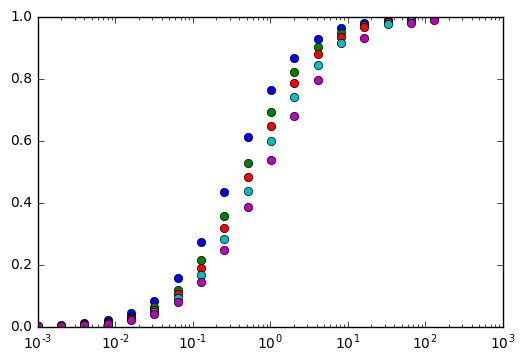

In [53]:
for i in range(bindset_n.size):
    plt.semilogx(ligset[i],bindset[i],'o')

In [56]:
wyman_obj_vec_v2(parmvec,ligset,rtots,bindset_n)

array([  1.25074232e-04,  -3.58426575e-04,  -7.21662634e-04,
         5.60241088e-04,   6.82192576e-04,  -6.88687827e-04,
         2.77592310e-03,   1.82878564e-02,   2.95425749e-03,
        -2.50390066e-03,  -2.83631698e-02,  -2.94351992e-02,
        -6.08267060e-02,  -1.54312710e-02,   3.52049783e-02,
        -1.15492466e-02,   1.95181850e-03,  -1.85217746e-02,
         3.38898312e-05,  -1.68323317e-04,   5.90841032e-06,
         5.44433724e-04,   1.25339307e-03,   2.33757785e-03,
        -6.88638183e-03,  -1.40508614e-02,  -8.24522016e-03,
         5.62652156e-02,   2.19659441e-02,  -2.79213294e-02,
        -1.97807678e-02,  -2.58459026e-02,   6.24195229e-02,
         4.67251216e-02,  -1.56631933e-04,  -6.36384810e-05,
         8.25069770e-05,   5.27139693e-04,  -1.74548045e-03,
         4.09387834e-04,   1.87983501e-04,  -1.76237247e-02,
        -3.24613882e-02,   3.82404623e-02,   3.88276918e-02,
         2.96629760e-02,   5.05699100e-02,  -6.80646954e-02,
        -1.42386478e-02,

In [57]:
err = 0.05*bindset_n

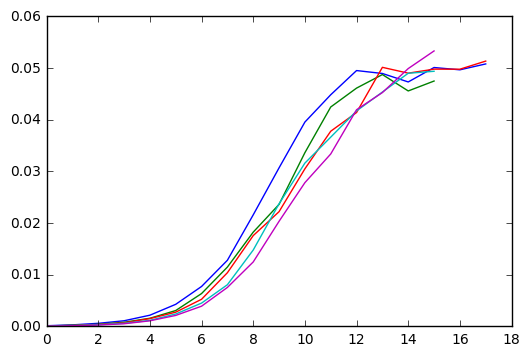

In [60]:
for i in err:
    plt.plot(i)

In [64]:
wyman_obj_vec_v2(parmvec,ligset,rtots,bindset_n,err)

array([  6.62946680e+03,  -3.86856069e+03,  -1.96495050e+03,
         4.62927614e+02,   1.44030270e+02,  -3.75547353e+01,
         4.63820414e+01,   1.11498684e+02,   6.33230767e+00,
        -2.65747243e+00,  -1.81269039e+01,  -1.46397957e+01,
        -2.47986719e+01,  -6.43727879e+00,   1.57216933e+01,
        -4.59860213e+00,   7.91133043e-01,  -7.17445843e+00,
         3.10897255e+03,  -3.47179719e+03,   3.32494514e+01,
         8.30387085e+02,   4.99010936e+02,   2.46823063e+02,
        -1.70032370e+02,  -1.06427111e+02,  -2.47514997e+01,
         1.00802653e+02,   1.94218443e+01,  -1.54777784e+01,
        -9.29558177e+00,  -1.08742597e+01,   3.00448783e+01,
         2.07108459e+01,  -1.57357865e+04,  -1.82540604e+03,
         6.31064712e+02,   1.07675860e+03,  -7.57148625e+02,
         5.37006280e+01,   6.80188355e+00,  -1.62972370e+02,
        -1.05005620e+02,   7.74869326e+01,   4.17159863e+01,
         2.07782955e+01,   2.94974511e+01,  -2.70625271e+01,
        -5.92474579e+00,

In [65]:
from scipy import optimize

In [67]:
help(optimize.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    In general, the optimization problems are of the form::
    
        minimize f(x) subject to
    
        g_i(x) >= 0,  i = 1,...,m
        h_j(x)  = 0,  j = 1,...,p
    
    where x is a vector of one or more variables.
    ``g_i(x)`` are the inequality constraints.
    ``h_j(x)`` are the equality constrains.
    
    Optionally, the lower and upper bounds for each element in x can also be
    specified using the `bounds` argument.
    
    Parameters
    ----------
    fun : callable
        Objective function.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (Jacobian, Hessian).
    method : str or callable, op

In [68]:
parmfit = np.ones(4)

In [69]:
parmfit

array([ 1.,  1.,  1.,  1.])

In [70]:
optimize.minimize(wyman_obj_vec_v2,parmfit,args=(ligset,rtots,bindset_n))

ValueError: setting an array element with a sequence.

In [71]:
type(bindset_n)

numpy.ndarray

In [72]:
type(rtots)

numpy.ndarray

In [73]:
type(ligset)

numpy.ndarray

In [74]:
type(parmfit)

numpy.ndarray

In [77]:
optimize.least_squares(wyman_obj_vec_v2,parmfit,args=(ligset,rtots,bindset_n))

/Users/michael/miniconda3/envs/fitter/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in sqrt


 active_mask: array([ 0.,  0.,  0.,  0.])
        cost: 0.053630363209856924
         fun: array([ -6.50554633e-04,  -1.90344429e-03,  -3.78695501e-03,
        -5.47307754e-03,  -1.10085663e-02,  -2.26652495e-02,
        -3.62482564e-02,  -4.43483680e-02,  -8.25634200e-02,
        -9.61891238e-02,  -1.09035670e-01,  -8.58779188e-02,
        -9.49608575e-02,  -3.43272396e-02,   2.52452813e-02,
        -1.66646598e-02,  -6.40791575e-04,  -1.98269359e-02,
        -3.35610546e-05,  -3.03244296e-04,  -2.63992492e-04,
         4.53439651e-06,   1.74236884e-04,   1.89035272e-04,
        -1.11006701e-02,  -2.19499312e-02,  -2.15268717e-02,
         3.79072438e-02,   2.42171628e-03,  -4.39637010e-02,
        -3.05325328e-02,  -3.21614237e-02,   5.89824440e-02,
         4.62612486e-02,   1.40701062e-05,   2.76196903e-04,
         7.55968320e-04,   1.84973648e-03,   8.06334292e-04,
         5.16839986e-03,   8.52459921e-03,  -4.50523713e-03,
        -1.49020428e-02,   5.74660634e-02,   5.61095324

In [79]:
a = np.linspace(0,5,20)

In [80]:
type(a)

numpy.ndarray

In [90]:
def wyman_obj_vec_v3(parm,lig,data,rtot,eps=None,gen=False):
    k11 = parm[0]
    k21 = parm[1]
    k22 = parm[2]
    l20 = parm[3]
    
    ligc = np.concatenate(lig)
    datac = np.concatenate(data)
    
    rfree = (((-1 - k11*ligc)) + \
    (np.sqrt(np.concatenate((np.square((1 + k11*lig)) + \
    8.*l20*rtot*(1 + k21*lig + k21*k22*(np.square(lig)))))))) \
    / (4*l20*(1 + k21*ligc + k21*k22*(np.square(ligc))))    
       
    bfrac = (k11*ligc + l20*k21*rfree*ligc + \
    2*l20*k21*k22*rfree*(np.square(ligc))) \
    / (1 + 2*l20*rfree + k11*ligc + \
    2*l20*k21*rfree*ligc + 2*l20*k21*k22*rfree*(np.square(ligc)))
    
    residual = (bfrac - datac)
    
    if gen is False:
        if eps is None:
            return residual
        else:
            weights = 1/np.square(np.concatenate(eps))
            return (residual*weights)
    else:
        return bfrac


In [88]:
parmvec

array([  3.70000000e+00,   1.80000000e+00,   1.20000000e-01,
         2.93000000e+02])

In [89]:
sim_parms

{'k11': 3.7, 'k21': 1.8, 'k22': 0.12, 'l20': 293.0}

In [91]:
help(wyman_sim_loop)

Help on function wyman_sim_loop in module __main__:

wyman_sim_loop(lig, rtot, parm)
    returns bound fraction for model of aggregating system as described by Wyman and implemened
    by Pike
    
    lig 
    -------
    is an array of arrays (created from a list of arrays -- because
    datasets may not have a uniform number of data points in each experiment)
    
    this is important for the loop below that uses lig.size to generate indices. if lig 
    was a proper array, size would be the total number of cells, but in this case it is the 
    number of arrays (or experimental data sets) in the array
    
    rtot 
    -------
    is a 1d array (but may work as other data structure -- test this)
    
    parm
    -------
    dict of parameter names and values or a Parameters object from the lmfit package



In [93]:
simloopout = wyman_sim_loop(ligset,rtots,sim_parms)

In [94]:
help(wyman_obj_vec_v3)

Help on function wyman_obj_vec_v3 in module __main__:

wyman_obj_vec_v3(parm, lig, data, rtot, eps=None, gen=False)



In [96]:
vecout = wyman_obj_vec_v3(parmvec,ligset,bindset_n,rtots,gen=True)

In [98]:
np.concatenate(simloopout) == vecout

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True], dtype=bool)

In [101]:
np.concatenate(simloopout) == np.concatenate(bindset)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True], dtype=bool)

In [115]:
vecout - np.concatenate(bindset_n)

array([  1.25074232e-04,  -3.58426575e-04,  -7.21662634e-04,
         5.60241088e-04,   6.82192576e-04,  -6.88687827e-04,
         2.77592310e-03,   1.82878564e-02,   2.95425749e-03,
        -2.50390066e-03,  -2.83631698e-02,  -2.94351992e-02,
        -6.08267060e-02,  -1.54312710e-02,   3.52049783e-02,
        -1.15492466e-02,   1.95181850e-03,  -1.85217746e-02,
         3.38898312e-05,  -1.68323317e-04,   5.90841032e-06,
         5.44433724e-04,   1.25339307e-03,   2.33757785e-03,
        -6.88638183e-03,  -1.40508614e-02,  -8.24522016e-03,
         5.62652156e-02,   2.19659441e-02,  -2.79213294e-02,
        -1.97807678e-02,  -2.58459026e-02,   6.24195229e-02,
         4.67251216e-02,  -1.56631933e-04,  -6.36384810e-05,
         8.25069770e-05,   5.27139693e-04,  -1.74548045e-03,
         4.09387834e-04,   1.87983501e-04,  -1.76237247e-02,
        -3.24613882e-02,   3.82404623e-02,   3.88276918e-02,
         2.96629760e-02,   5.05699100e-02,  -6.80646954e-02,
        -1.42386478e-02,

In [103]:
parmfit

array([ 1.,  1.,  1.,  1.])

In [105]:
parmvec

array([  3.70000000e+00,   1.80000000e+00,   1.20000000e-01,
         2.93000000e+02])

In [111]:
parmfit[3] = 300

In [112]:
parmfit

array([   5.,    5.,    1.,  300.])

In [114]:
res_lsq = optimize.least_squares(wyman_obj_vec_v3,parmvec,args=(ligset,bindset_n,rtots))

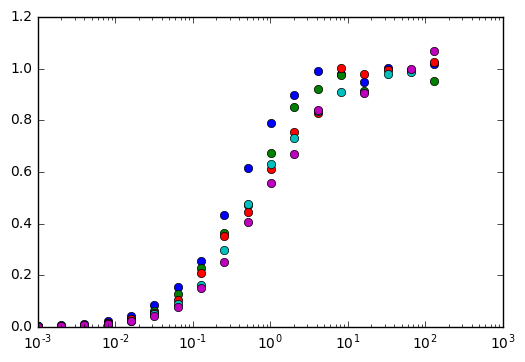

In [117]:
for i in range(bindset_n.size):
    plt.semilogx(ligset[i],bindset_n[i],'o')

In [120]:
res_lsq.x

array([  4.96790055e+00,   2.23029236e+00,   2.92971309e-01,
         1.09048524e+03])

In [121]:
help(wyman_obj_vec_v3)

Help on function wyman_obj_vec_v3 in module __main__:

wyman_obj_vec_v3(parm, lig, data, rtot, eps=None, gen=False)



In [125]:
def wyman_sim_parmvec(parm,lig,rtot):
    """ Generates bound fraction for Wyman model given parameters and returns as 
    nested array simulated dataset  
    parm is a 1-D numpy array that must describe [k11,k21,k22,l20]
    lig is a 1-D array or 1-D array of 1-D arrays of ligand concentrations
    rtot is a 1-D numpy array of total receptor concentrations for each data set
    size of rtot and lig must match 
    """
    k11 = parm[0]
    k21 = parm[1]
    k22 = parm[2]
    l20 = parm[3]
    
    holder = []
    
    for i in range(lig.size):
        rfree = (((-1 - k11*lig[i]) + \
        (np.sqrt((1 + k11*lig[i])**2 + 8*l20*rtot[i]*(1 + k21*lig[i] + \
        k21*k22*(lig[i]**2)))))/(4*l20*(1 + k21*lig[i] + k21*k22*(lig[i]**2))))
        
        bfrac = (k11*lig[i] + l20*k21*rfree*lig[i] + \
        2*l20*k21*k22*rfree*(lig[i]**2))/(1 + 2*l20*rfree + k11*lig[i] + \
        2*l20*k21*rfree*lig[i] + 2*l20*k21*k22*rfree*(lig[i]**2))
        
        holder.append(bfrac)
        
    return np.array(holder)

In [126]:
wyman_sim_parmvec(parmvec,ligset,rtots)

array([ array([ 0.00287218,  0.0057293 ,  0.01139886,  0.02256218,  0.04420898,
        0.08495766,  0.15750031,  0.27442734,  0.43494373,  0.61140532,
        0.76276266,  0.86736558,  0.92969257,  0.9637874 ,  0.98162164,
        0.99074192,  0.99535363,  0.99767247]),
       array([ 0.00212201,  0.00423545,  0.00843679,  0.01673873,  0.03295043,
        0.06388646,  0.12039349,  0.21575195,  0.3567863 ,  0.52877848,
        0.69457034,  0.82154023,  0.90281887,  0.9492021 ,  0.97402094,
        0.99668726]),
       array([ 0.00183875,  0.00367067,  0.00731417,  0.01452088,  0.02862117,
        0.05563083,  0.10532975,  0.19035641,  0.3191859 ,  0.4825415 ,
        0.64899583,  0.78533335,  0.87867192,  0.93494879,  0.96622051,
        0.98277258,  0.99129847,  0.99562683]),
       array([ 0.0016043 ,  0.00320301,  0.00638376,  0.0126794 ,  0.02501369,
        0.04870285,  0.09251507,  0.16819537,  0.28486929,  0.43720977,
        0.5996735 ,  0.741466  ,  0.84618727,  0.91418393,  0

In [127]:
vecout

array([ 0.00287218,  0.0057293 ,  0.01139886,  0.02256218,  0.04420898,
        0.08495766,  0.15750031,  0.27442734,  0.43494373,  0.61140532,
        0.76276266,  0.86736558,  0.92969257,  0.9637874 ,  0.98162164,
        0.99074192,  0.99535363,  0.99767247,  0.00212201,  0.00423545,
        0.00843679,  0.01673873,  0.03295043,  0.06388646,  0.12039349,
        0.21575195,  0.3567863 ,  0.52877848,  0.69457034,  0.82154023,
        0.90281887,  0.9492021 ,  0.97402094,  0.99668726,  0.00183875,
        0.00367067,  0.00731417,  0.01452088,  0.02862117,  0.05563083,
        0.10532975,  0.19035641,  0.3191859 ,  0.4825415 ,  0.64899583,
        0.78533335,  0.87867192,  0.93494879,  0.96622051,  0.98277258,
        0.99129847,  0.99562683,  0.0016043 ,  0.00320301,  0.00638376,
        0.0126794 ,  0.02501369,  0.04870285,  0.09251507,  0.16819537,
        0.28486929,  0.43720977,  0.5996735 ,  0.741466  ,  0.84618727,
        0.91418393,  0.97630818,  0.98793257,  0.00136943,  0.00

In [130]:
blerby = wyman_sim_parmvec(res_lsq.x,ligset,rtots)

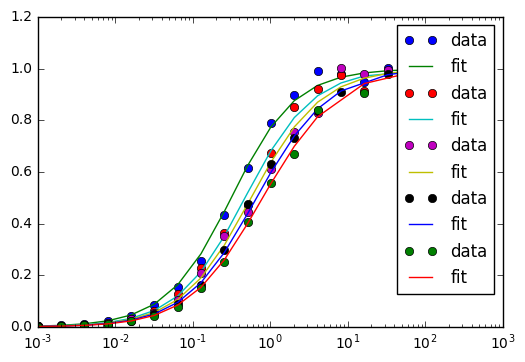

In [134]:
for i in range(bindset_n.size):
    plt.semilogx(ligset[i],bindset_n[i],'o',label='data')
    plt.semilogx(ligset[i],blerby[i],label='fit')
    plt.legend()

In [133]:
clr = ['b','g','r','c','m']

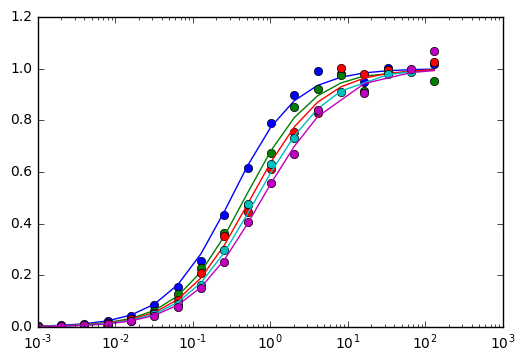

In [135]:
for i in range(bindset_n.size):
    plt.semilogx(ligset[i],bindset_n[i],'o',label='data',color=clr[i])
    plt.semilogx(ligset[i],blerby[i],label='fit', color=clr[i])